# ANN - Artificial Neural Networks

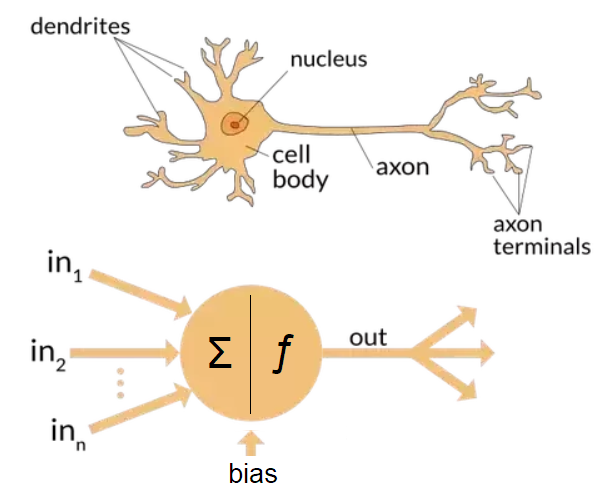

## Model

In [169]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import numpy as np
hit = pd.read_csv("../../Datasets/Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'Division', 'League', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, ms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [170]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [171]:
from sklearn.neural_network import MLPRegressor

In [172]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 20),random_state=42).fit(X_train, y_train)

In [173]:
mlp_model.n_layers_

4

## Prediction

In [174]:
from sklearn.metrics import mean_squared_error, r2_score

In [175]:
y_pred = mlp_model.predict(X_test)

In [176]:
np.sqrt(mean_squared_error(y_test, y_pred))

430.05540262400365

In [177]:
r2_score(y_test, y_pred)

0.14564301785285494

## Model Tuning

In [183]:
params = {
    'alpha': [.1, .01, .02, .005],
    'hidden_layer_sizes': [(20,20), (100, 50, 150), (300, 200, 150)],
    'activation': ['relu', 'logistic'],
}

In [184]:
from sklearn.model_selection import GridSearchCV

In [185]:
mlp_cv_model = GridSearchCV(mlp_model, params, cv=10)

In [186]:
mlp_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=MLPRegressor(hidden_layer_sizes=(100, 20),
                                    random_state=42),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [187]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (100, 50, 150)}

In [189]:
mlp_tuned = MLPRegressor(alpha=.005, hidden_layer_sizes=(100, 50, 150)).fit(X_train, y_train)

In [190]:
y_pred = mlp_tuned.predict(X_test)

In [191]:
np.sqrt(mean_squared_error(y_test, y_pred))

352.8413019971932

In [192]:
r2_score(y_test, y_pred)

0.42489202613947863